## Stroke prediction

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# classification
from sklearn.svm import SVC
from sklearn.metrics  import (f1_score ,accuracy_score, confusion_matrix,
                            classification_report, ConfusionMatrixDisplay)
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
# sns.set_theme(style="ggplot")

### EDA

In [2]:
df_path = '../datasets/stroke_data.csv'
# stroke_data_eng.csv
df = pd.read_csv(df_path, index_col=0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
cols = df.columns
cols

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Nulls, duplicates etc

In [13]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
df[df['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
27419,Female,59.0,0,0,1,Private,Rural,76.15,NaN,Unknown,1
8213,Male,78.0,0,1,1,Private,Urban,219.84,NaN,Unknown,1
25226,Male,57.0,0,1,0,Govt_job,Urban,217.08,NaN,Unknown,1
61843,Male,58.0,0,0,1,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
42007,Male,41.0,0,0,0,Private,Rural,70.15,NaN,formerly smoked,0
28788,Male,40.0,0,0,1,Private,Urban,191.15,NaN,smokes,0
32235,Female,45.0,1,0,1,Govt_job,Rural,95.02,NaN,smokes,0


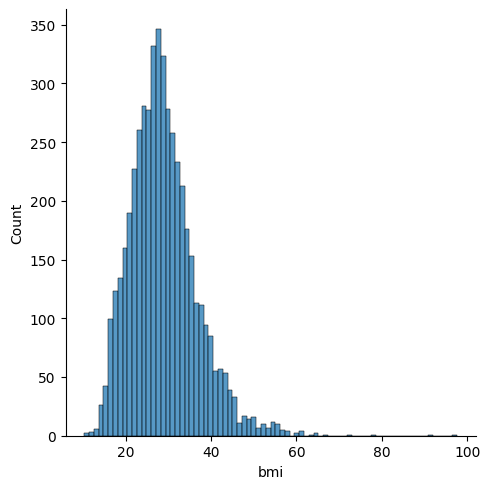

In [17]:
sns.displot(df, x='bmi')

In [18]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [19]:
df['bmi'].median()

28.1

In [20]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [22]:
df['bmi'].mean()

28.893236911794663

### Handling booleans

In [23]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [5]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [6]:
df[['ever_married']] = df[['ever_married']].replace({'Yes': True, 'No': False})

C:\Users\User\AppData\Local\Temp\ipykernel_1696\701064685.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['ever_married']] = df[['ever_married']].replace({'Yes': True, 'No': False})


In [7]:
df[['ever_married']] = df[['ever_married']].astype('int')

In [8]:
len(cols)

11

### Saving new cleaned df

In [85]:
# df.to_csv("../datasets/stroke_data_eng.csv")

### Distribution plots

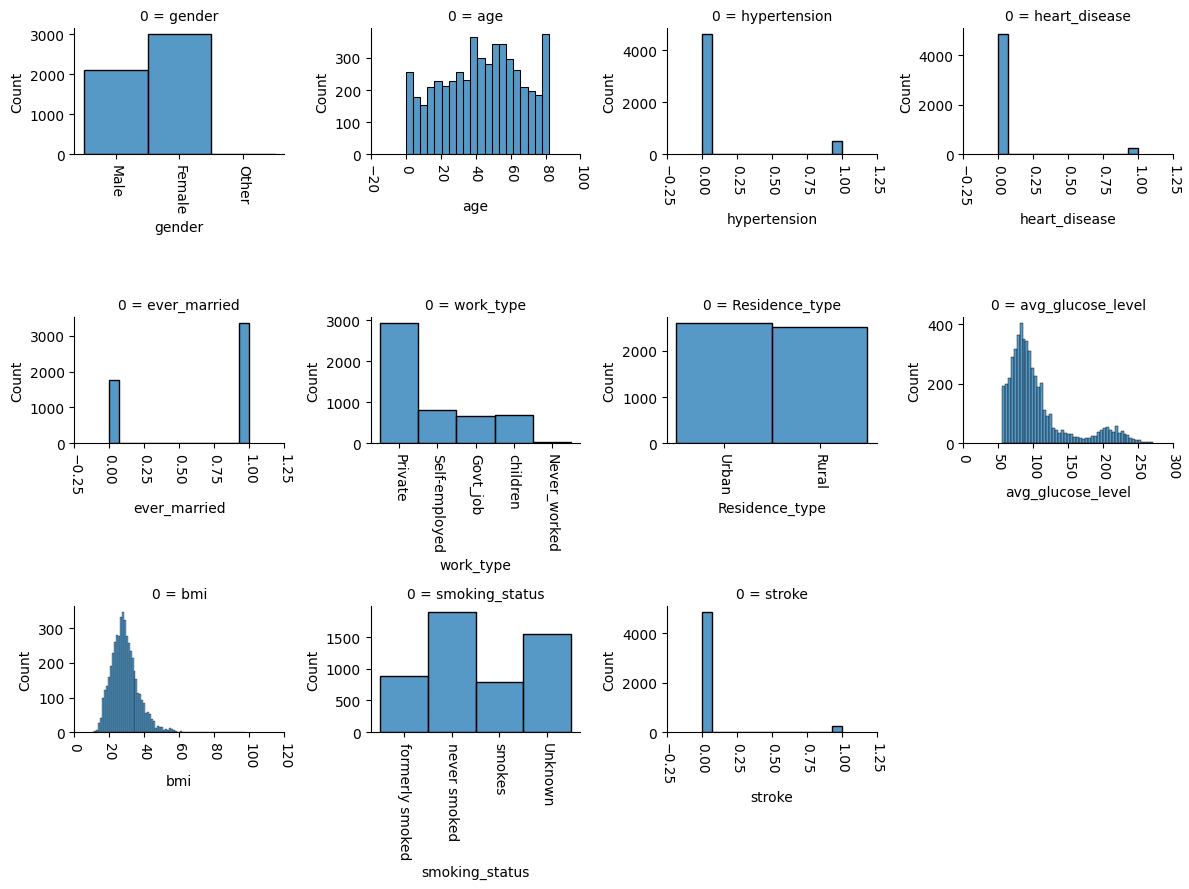

In [9]:
g = sns.FacetGrid(pd.DataFrame(list(cols)), col=0, col_wrap=4, sharex=False, sharey=False)
for ax, col in zip(g.axes, list(cols)):
    sns.histplot(df[col], ax=ax)
g.set_xticklabels(rotation=-90)
g.tight_layout()

In [40]:
# Define the number of rows and columns you want
# n_rows=3
# n_cols=4
# # Create the subplots
# fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
# for i, column in enumerate(df.columns):
#     sns.histplot(df[column],ax=axes[i//n_cols,i%n_cols])
# fig.tight_layout()

### Pairplots

It seem, perhaps expectedly, the data is heavily skewed towards patient with no heart diesease, no hypertension and without having suffered a stroke. Also, about twice of the pasrticipants were ever married, and most work for a private company.

Let's look at some relations between potentially obvious factors and the target

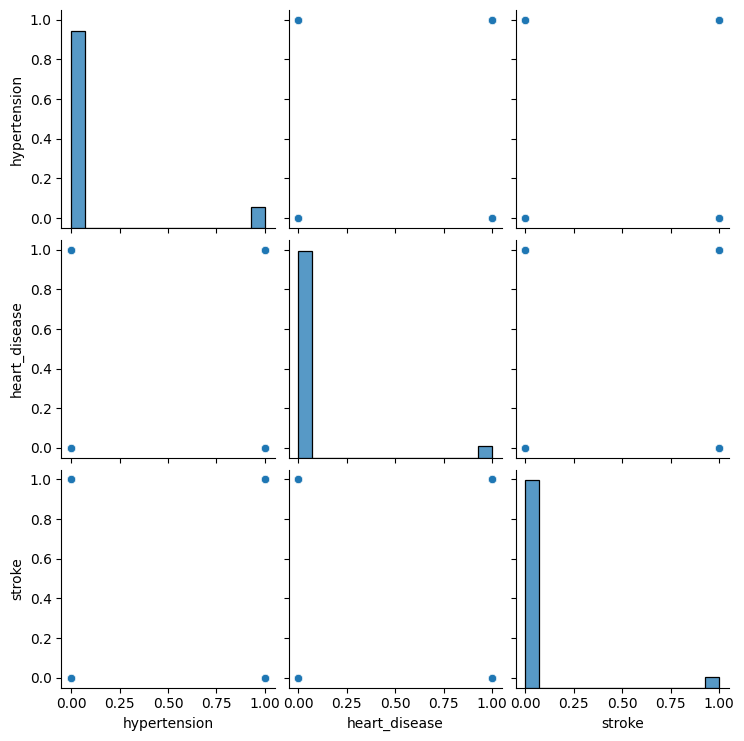

In [10]:
sns.pairplot(df[['hypertension', 'heart_disease', 'stroke', 'smoking_status']])

### Stroke vs no stroke explorations

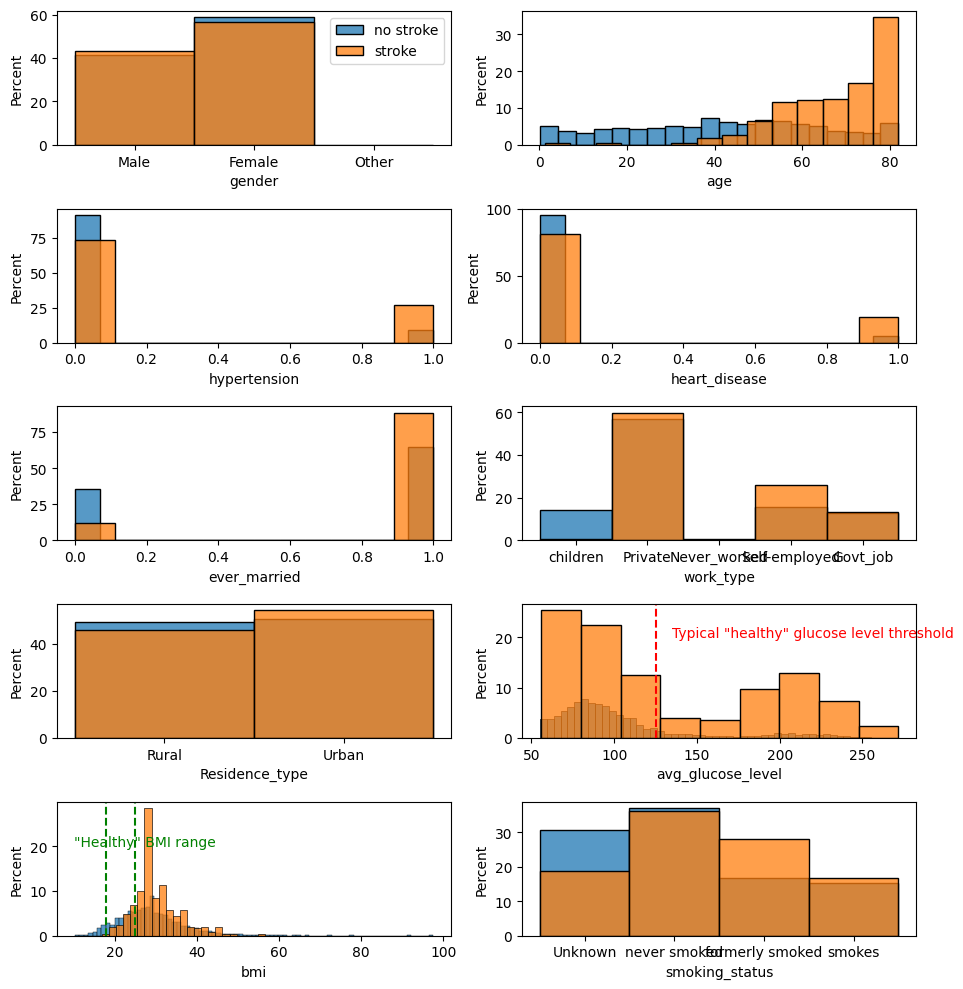

In [48]:
fig, axes = plt.subplots(5,2, figsize=(10,10))
stroke_df = df[df['stroke'] == 1]
nostroke_df = df[df['stroke'] == 0]
cols_no_stroke = [col for col in cols if col != 'stroke']

ax = axes.ravel()

for i in range(10):
    # sns.histplot(data=df, x=cols_no_stroke[i], hue='stroke', stat='density', ax=ax[i])
    sns.histplot(data = nostroke_df, x=cols_no_stroke[i], stat='percent', ax=ax[i])
    sns.histplot(data = stroke_df, x=cols_no_stroke[i], stat='percent', ax=ax[i])

    # additional vertical lines
    dist_col = cols_no_stroke[i]
    if dist_col == 'bmi':
        ax[i].axvline(x=18, ymin=0, ymax=30, color="green", linestyle="dashed")
        ax[i].axvline(x=25, ymin=0, ymax=30, color="green", linestyle="dashed")
        ax[i].text(10, 20, '"Healthy" BMI range', color="green")
    if dist_col == "avg_glucose_level":
        ax[i].axvline(x=125, ymin=0, ymax=30, color="red", linestyle="dashed")
        ax[i].text(135, 20, 'Typical "healthy" glucose level threshold', color="red")
ax[0].legend(['no stroke', 'stroke'], loc='best')
fig.tight_layout()

In [49]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

Let's calculate how much likely are people to have had hypertension or heart disease if they suffered a stroke compared to if they hadn't, by calculating the percentages within the group

In [83]:
stroke_nostroke_df = pd.DataFrame(columns=['stroke', 'no stroke'])
stroke_nostroke_df

#hypertension
stroke_hypertension = stroke_df[['hypertension']].value_counts()
nostroke_hypertension = nostroke_df[['hypertension']].value_counts()
new_row = {
    'stroke': stroke_hypertension[1] * 100 / stroke_hypertension[0],
    'no stroke': nostroke_hypertension[1] * 100 / nostroke_hypertension[0]
}
new_df = pd.DataFrame([new_row])
new_df.index = ['hypertension']

stroke_nostroke_df = pd.concat([stroke_nostroke_df, new_df])

# heart disease
stroke_heart = stroke_df[['heart_disease']].value_counts()
nostroke_heart = nostroke_df[['heart_disease']].value_counts()

new_row = {
    'stroke': stroke_heart[1] * 100 / stroke_heart[0],
    'no stroke': nostroke_heart[1] * 100 / nostroke_heart[0]
}

new_df = pd.DataFrame([new_row])
new_df.index = ['heart_disease']

stroke_nostroke_df = pd.concat([stroke_nostroke_df, new_df])

# smoking status
stroke_smokes = stroke_df[['smoking_status']].value_counts()
nostroke_smokes = nostroke_df[['smoking_status']].value_counts()

new_row = {
    'stroke': (stroke_smokes[1] + stroke_smokes[3])  * 100 / (stroke_smokes[0] + stroke_smokes[2]),
    'no stroke': (nostroke_smokes[1] + nostroke_smokes[3])  * 100 / (nostroke_smokes[0] + nostroke_smokes[2]),
}

new_df = pd.DataFrame([new_row])
new_df.index = ['smokes']

stroke_nostroke_df = pd.concat([stroke_nostroke_df, new_df])

stroke_nostroke_df['proportion'] = stroke_nostroke_df['stroke'] / stroke_nostroke_df['no stroke']
stroke_nostroke_df

C:\Users\User\AppData\Local\Temp\ipykernel_1696\1811872230.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stroke_nostroke_df = pd.concat([stroke_nostroke_df, new_df])
C:\Users\User\AppData\Local\Temp\ipykernel_1696\1811872230.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'stroke': (stroke_smokes[1] + stroke_smokes[3])  * 100 / (stroke_smokes[0] + stroke_smokes[2]),
C:\Users\User\AppData\Local\Temp\ipykernel_1696\1811872230.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

,stroke,no stroke,proportion
hypertension,36.065574,9.753895,3.697556
heart_disease,23.267327,4.943869,4.706299
smokes,81.751825,85.747039,0.953407


It would seem that patients who suffer a stroke are about 3.7 times as likely to have hypertension and about 4.7 times as likely to have had problems with heart disease. Interestingly, in this dataset the percentage of smoking patients doesnt seem to be related to the chance of suffering a stroke, even though, it is often thought of as a possible important factor

Looking at percentage comparisons:
* Almost all of the patients who suffered a stroke were over the age of 40
* The above calculations related to hypertension and heart disease
* Most who have suffered a stroke are outside the typically cited "healthy" BMI range
* There's a noticeable, but not as significant relation to having been married and suffering a stroke

## Dimensionality reduction

#### Encoding - Label encoding and One Hot

In [86]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [87]:
df_enc = df.copy()

In [88]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
31112,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
60182,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


In [91]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [93]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [94]:
dummy_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']
for col in dummy_cols:
    one_hot = pd.get_dummies(df[col])
    # drop the original column
    df_enc = df_enc.drop(col, axis=1)
    # add / join the encoded df
    df_enc = df_enc.join(one_hot)
df_enc.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Female,Male,Other,...,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,1,228.69,36.600000,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
51676,61.0,0,0,1,202.21,28.893237,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
31112,80.0,0,1,1,105.92,32.500000,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
60182,49.0,0,0,1,171.23,34.400000,1,True,False,False,...,False,True,False,False,False,True,False,False,False,True
1665,79.0,1,0,1,174.12,24.000000,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False


In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_enc)
df_enc_scaled = scaler.transform(df_enc)

In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_enc_scaled)

X_pca = pca.transform(df_enc_scaled)

In [101]:
X_pca.shape

(5110, 2)

In [102]:
y = df['stroke']

In [106]:
y

id
9046     1
51676    1
31112    1
60182    1
1665     1
        ..
18234    0
44873    0
19723    0
37544    0
44679    0
Name: stroke, Length: 5110, dtype: int64

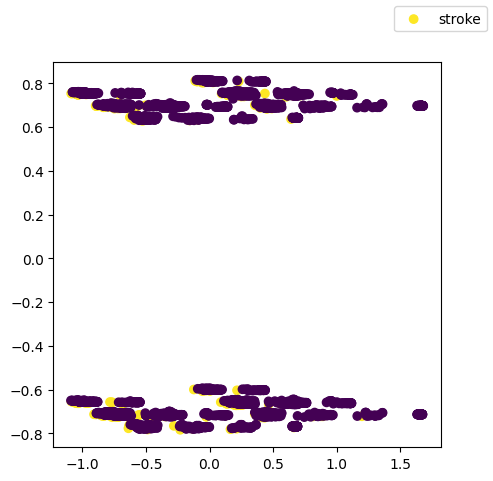

In [108]:
fig = plt.figure(1, figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(X_pca[:,0], X_pca[:,1], c=y)
fig.legend(['stroke', 'no stroke'])

Not especially useful unfortunately

Text(0, 0.5, 'Principal components')

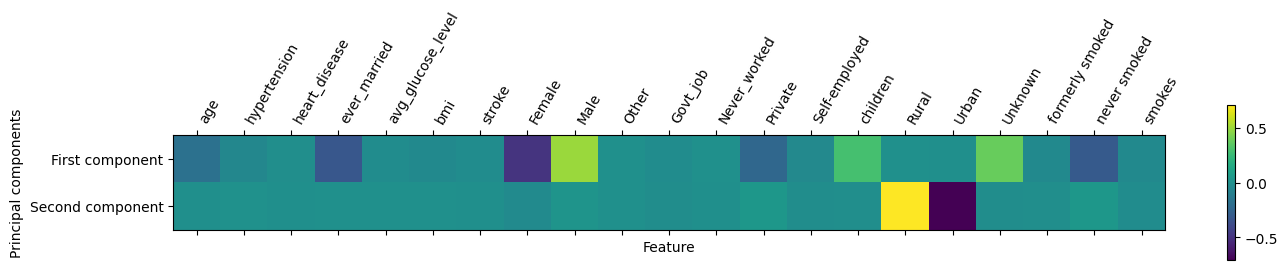

In [110]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(df_enc.columns)),
           df_enc.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Dirty code

#### smoking

In [80]:
# stroke_smoking = stroke_df[['smoking_status']].value_counts()
# stroke_smoking = pd.DataFrame(stroke_smoking)
# stroke_smoking

In [81]:
# nostroke_smoking = nostroke_df[['smoking_status']].value_counts()
# nostroke_smoking = pd.DataFrame(nostroke_smoking)
# nostroke_smoking

In [60]:
# fig, (ax1, ax2) = plt.subplots(1,2)

# # fig = sns.barplot(pd.DataFrame(stroke_smoking), x='smoking_status', y='count')
# sns.histplot(with_stroke, x='smoking_status', stat='percent', ax=ax1)
# ax1.set_title("With stroke smoking_status")
# # ax1.set_xlabel(rotation=-90)

# sns.histplot(df, x='smoking_status', stat='percent', ax=ax2)
# ax2.set_title("smoking_status")
# # ax2.set_xlabel(rotation=-90)